In [103]:
import pandas as pd
import numpy as np
import os
from math import floor
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [102]:
# Reading data
df1 = pd.read_csv('../data/dataset.csv')
df2 = pd.read_csv('../data/TCS.BO.csv')
# Adding price column to the indicator dataset
n = df1['Date'].size
df2Close = df2['Close'].to_list()
df2Date = df2['Date'].to_list()
prices = []
for i in range(n):
    df1Date = df1['Date'].iloc[i]
    price = df2Close[df2Date.index(df1Date)]
    prices.append(price)

df1['Price'] = prices
features = df1.columns[1:-1]

# Building the final datset to be used throughout
df = pd.concat([df1['Date'],df1['Price'],df1[features]], axis=1)

In [19]:
features = ['EMV_50','WILLR_14','STOCH_k','CCI_14','WILLR_20','WILLR_125','RSI_12']
df = df[['Date','Price']+features+['Signal']]
X_train = df[features].iloc[0:floor(n*0.7)]
X_test = df[features].iloc[floor(n*0.7):]
y_train = df['Signal'].iloc[0:floor(n*0.7)]
y_test = df['Signal'].iloc[floor(n*0.7):]

In [83]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Maximum number of levels in tree
max_depth = [2,4,6,8,10]
# Criterion to be used
criterion = ['gini','entropy']
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [84]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'criterion': criterion,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_depth': [2, 4, 6, 8, 10], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]}


In [105]:
rf_Model = RandomForestClassifier()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3)
rf_Grid.fit(X_train, y_train)
rf_Grid.best_params_

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 41}

In [106]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train)}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test)}')
pred_rf = rf_Grid.predict(X_test)

Train Accuracy - : 0.5962301587301587
Test Accuracy - : 0.574402467232074


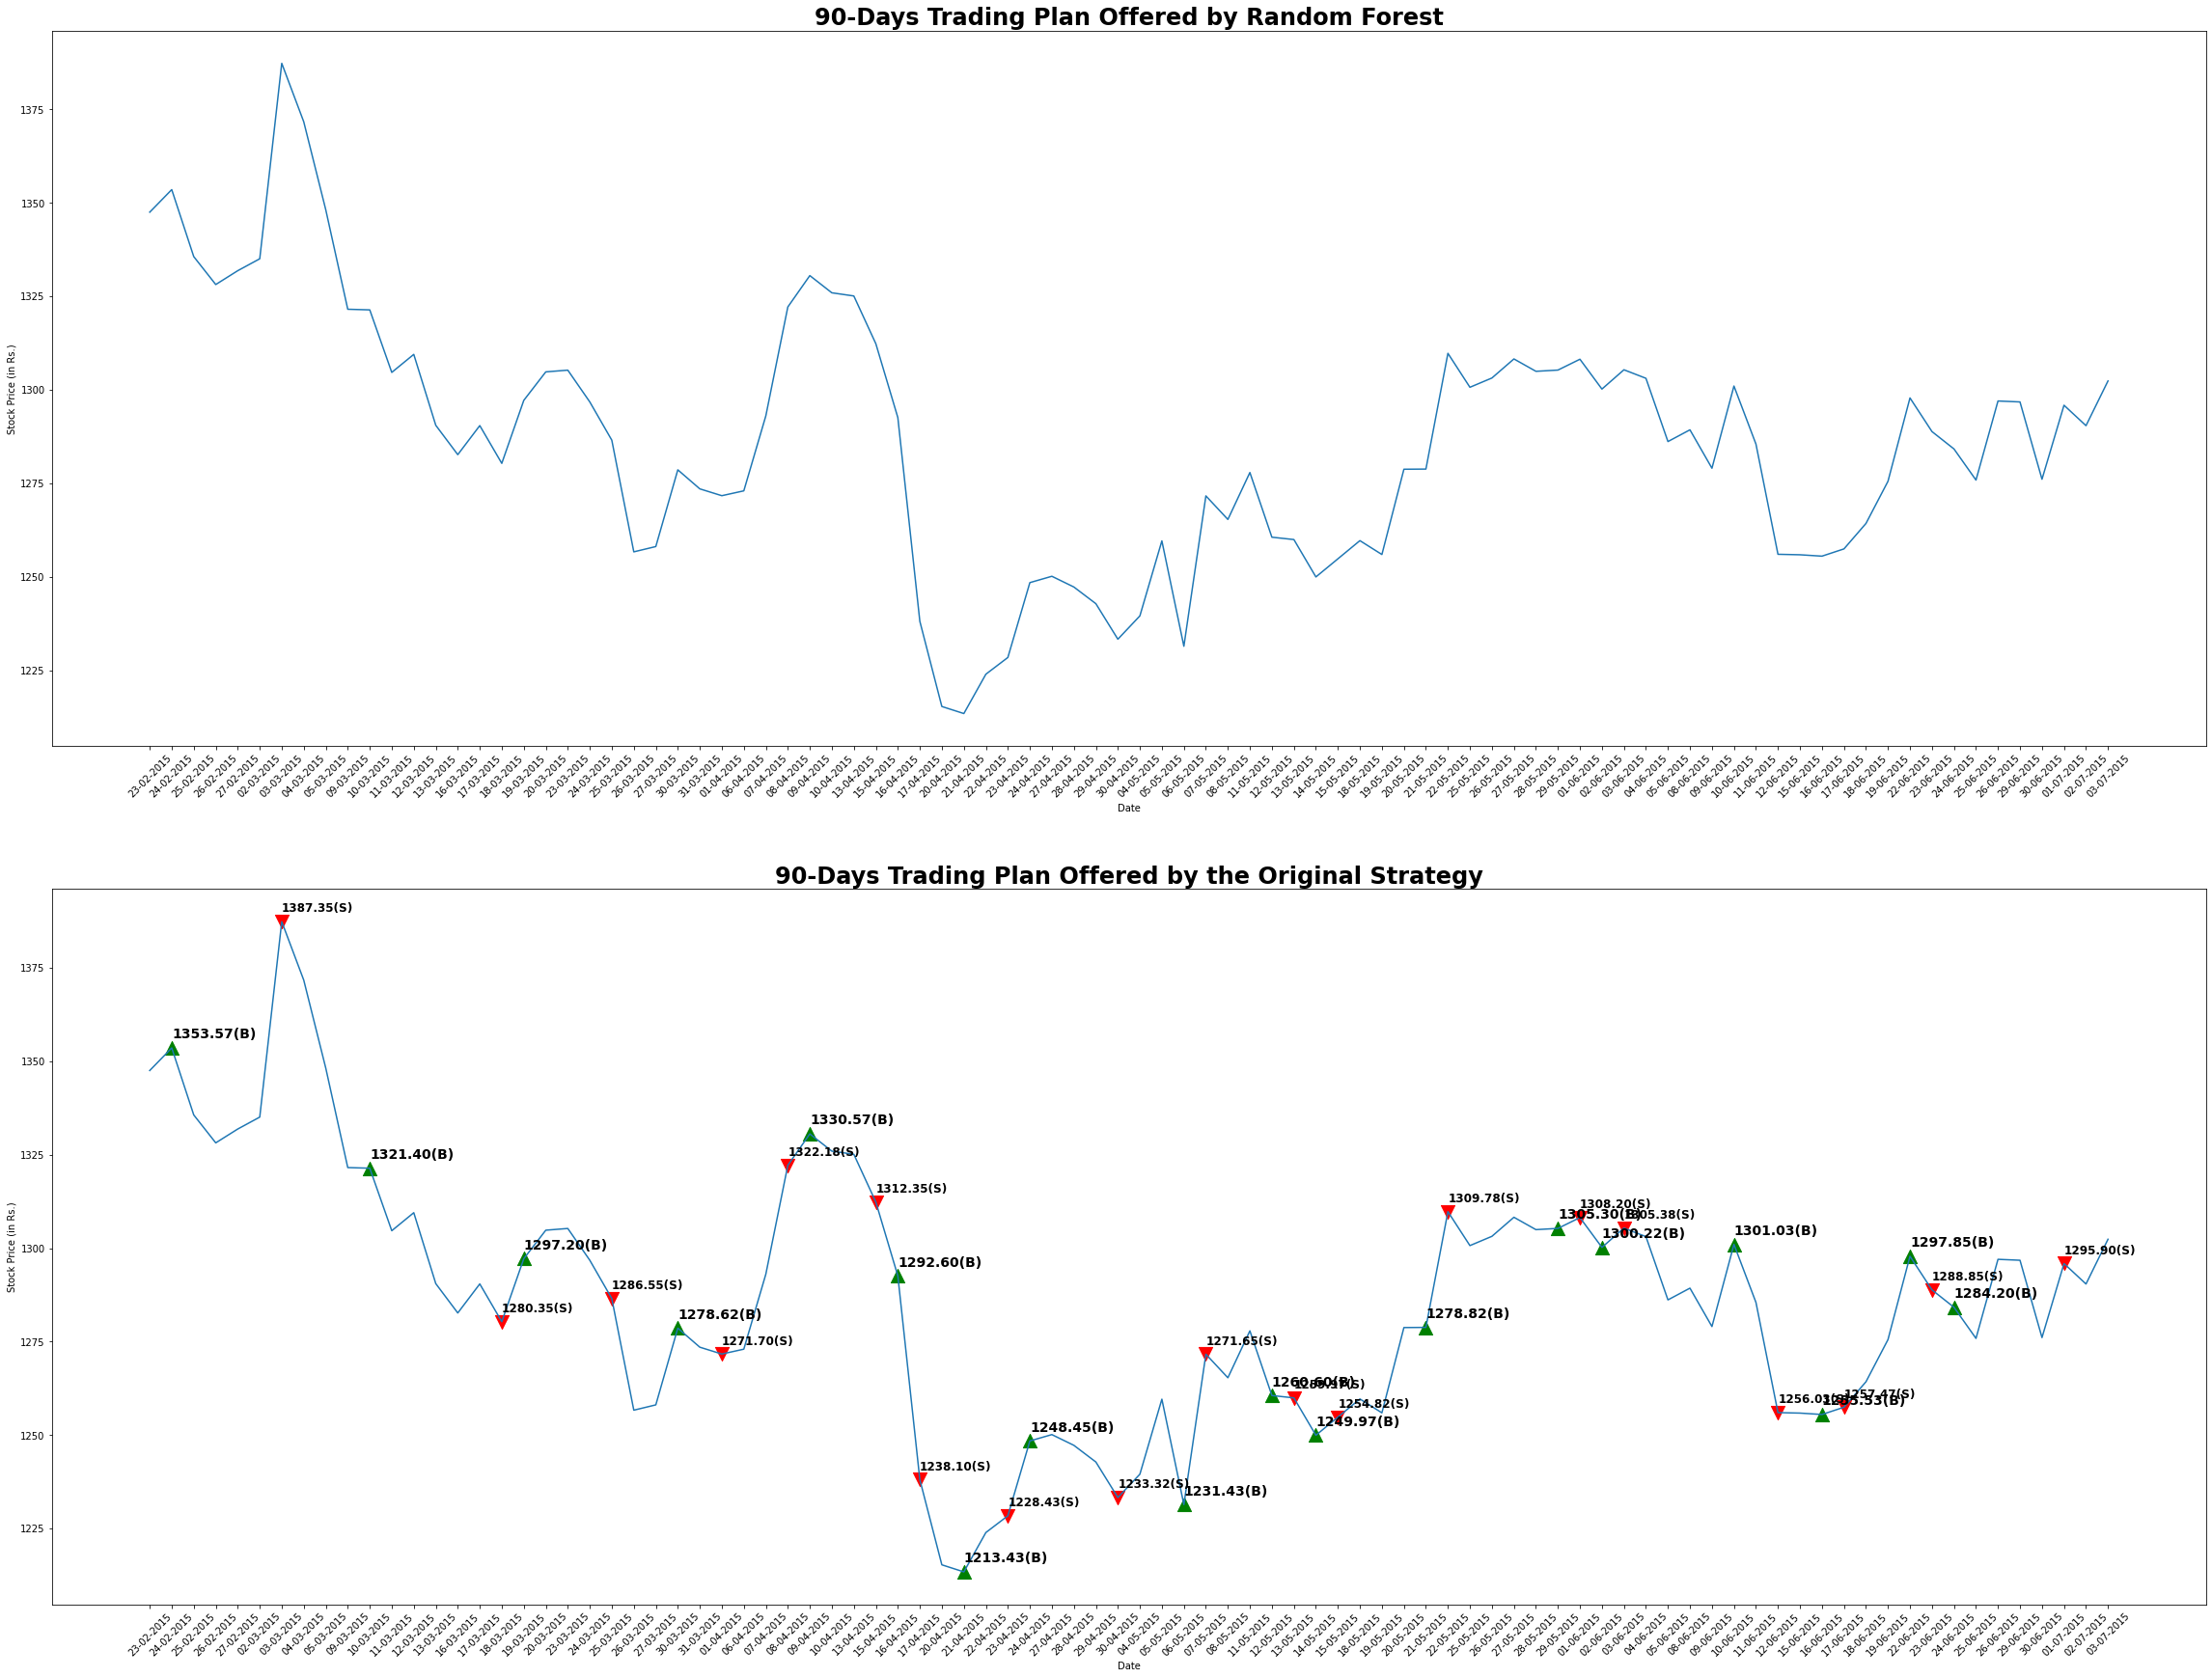

In [107]:
nDays = 90  # N-days for signal visualization
# Visualizing N-days trading plan offered by the model
fig = plt.figure(figsize=(40,30))
plt.subplot(2,1,1)
plt.plot(df['Date'].iloc[floor(n*0.7):floor(n*0.7)+nDays], df['Price'].iloc[floor(n*0.7):floor(n*0.7)+nDays], '-')
i = 0
for x,y in zip(df['Date'].iloc[floor(n*0.7):floor(n*0.7)+nDays],df['Price'].iloc[floor(n*0.7):floor(n*0.7)+nDays]):
    label = pred_rf[i]
    if(label=='WAIT'): label = ''
    elif(label=='BUY'): 
        label = '{:.2f}(B)'.format(y)
        plt.scatter(x=x, y=y, marker='^', c='g', s=200, alpha=1.0)
        plt.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='left', fontsize=18, fontweight='bold')
    else: 
        label = '{:.2f}(S)'.format(y)
        plt.scatter(x=x, y=y, marker='v', c='r', s=200, alpha=1.0)
        plt.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='left', fontsize=18, fontweight='bold')
    i = i+1
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Stock Price (in Rs.)')
plt.title('90-Days Trading Plan Offered by Random Forest', fontsize=24, fontweight='bold')

# Visualizing N-days trading plan offered by the original strategy
plt.subplot(2,1,2)
plt.plot(df['Date'].iloc[floor(n*0.7):floor(n*0.7)+nDays], df['Price'].iloc[floor(n*0.7):floor(n*0.7)+nDays], '-')
i = 0
for x,y in zip(df['Date'].iloc[floor(n*0.7):floor(n*0.7)+nDays],df['Price'].iloc[floor(n*0.7):floor(n*0.7)+nDays]):
    label = df['Signal'].iloc[i]
    if(label=='WAIT'): label = ''
    elif(label=='BUY'): 
        label = '{:.2f}(B)'.format(y)
        plt.scatter(x=x, y=y, marker='^', c='g', s=200, alpha=1.0)
        plt.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='left', fontsize=14, fontweight='bold')
    else: 
        label = '{:.2f}(S)'.format(y)
        plt.scatter(x=x, y=y, marker='v', c='r', s=200, alpha=1.0)
        plt.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='left', fontsize=12, fontweight='bold')
    i = i+1
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Stock Price (in Rs.)')
plt.title('90-Days Trading Plan Offered by the Original Strategy', fontsize=24, fontweight='bold')
plt.show()

In [108]:
# Decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
accuracy_score(y_test,ypred)

0.46414803392444104

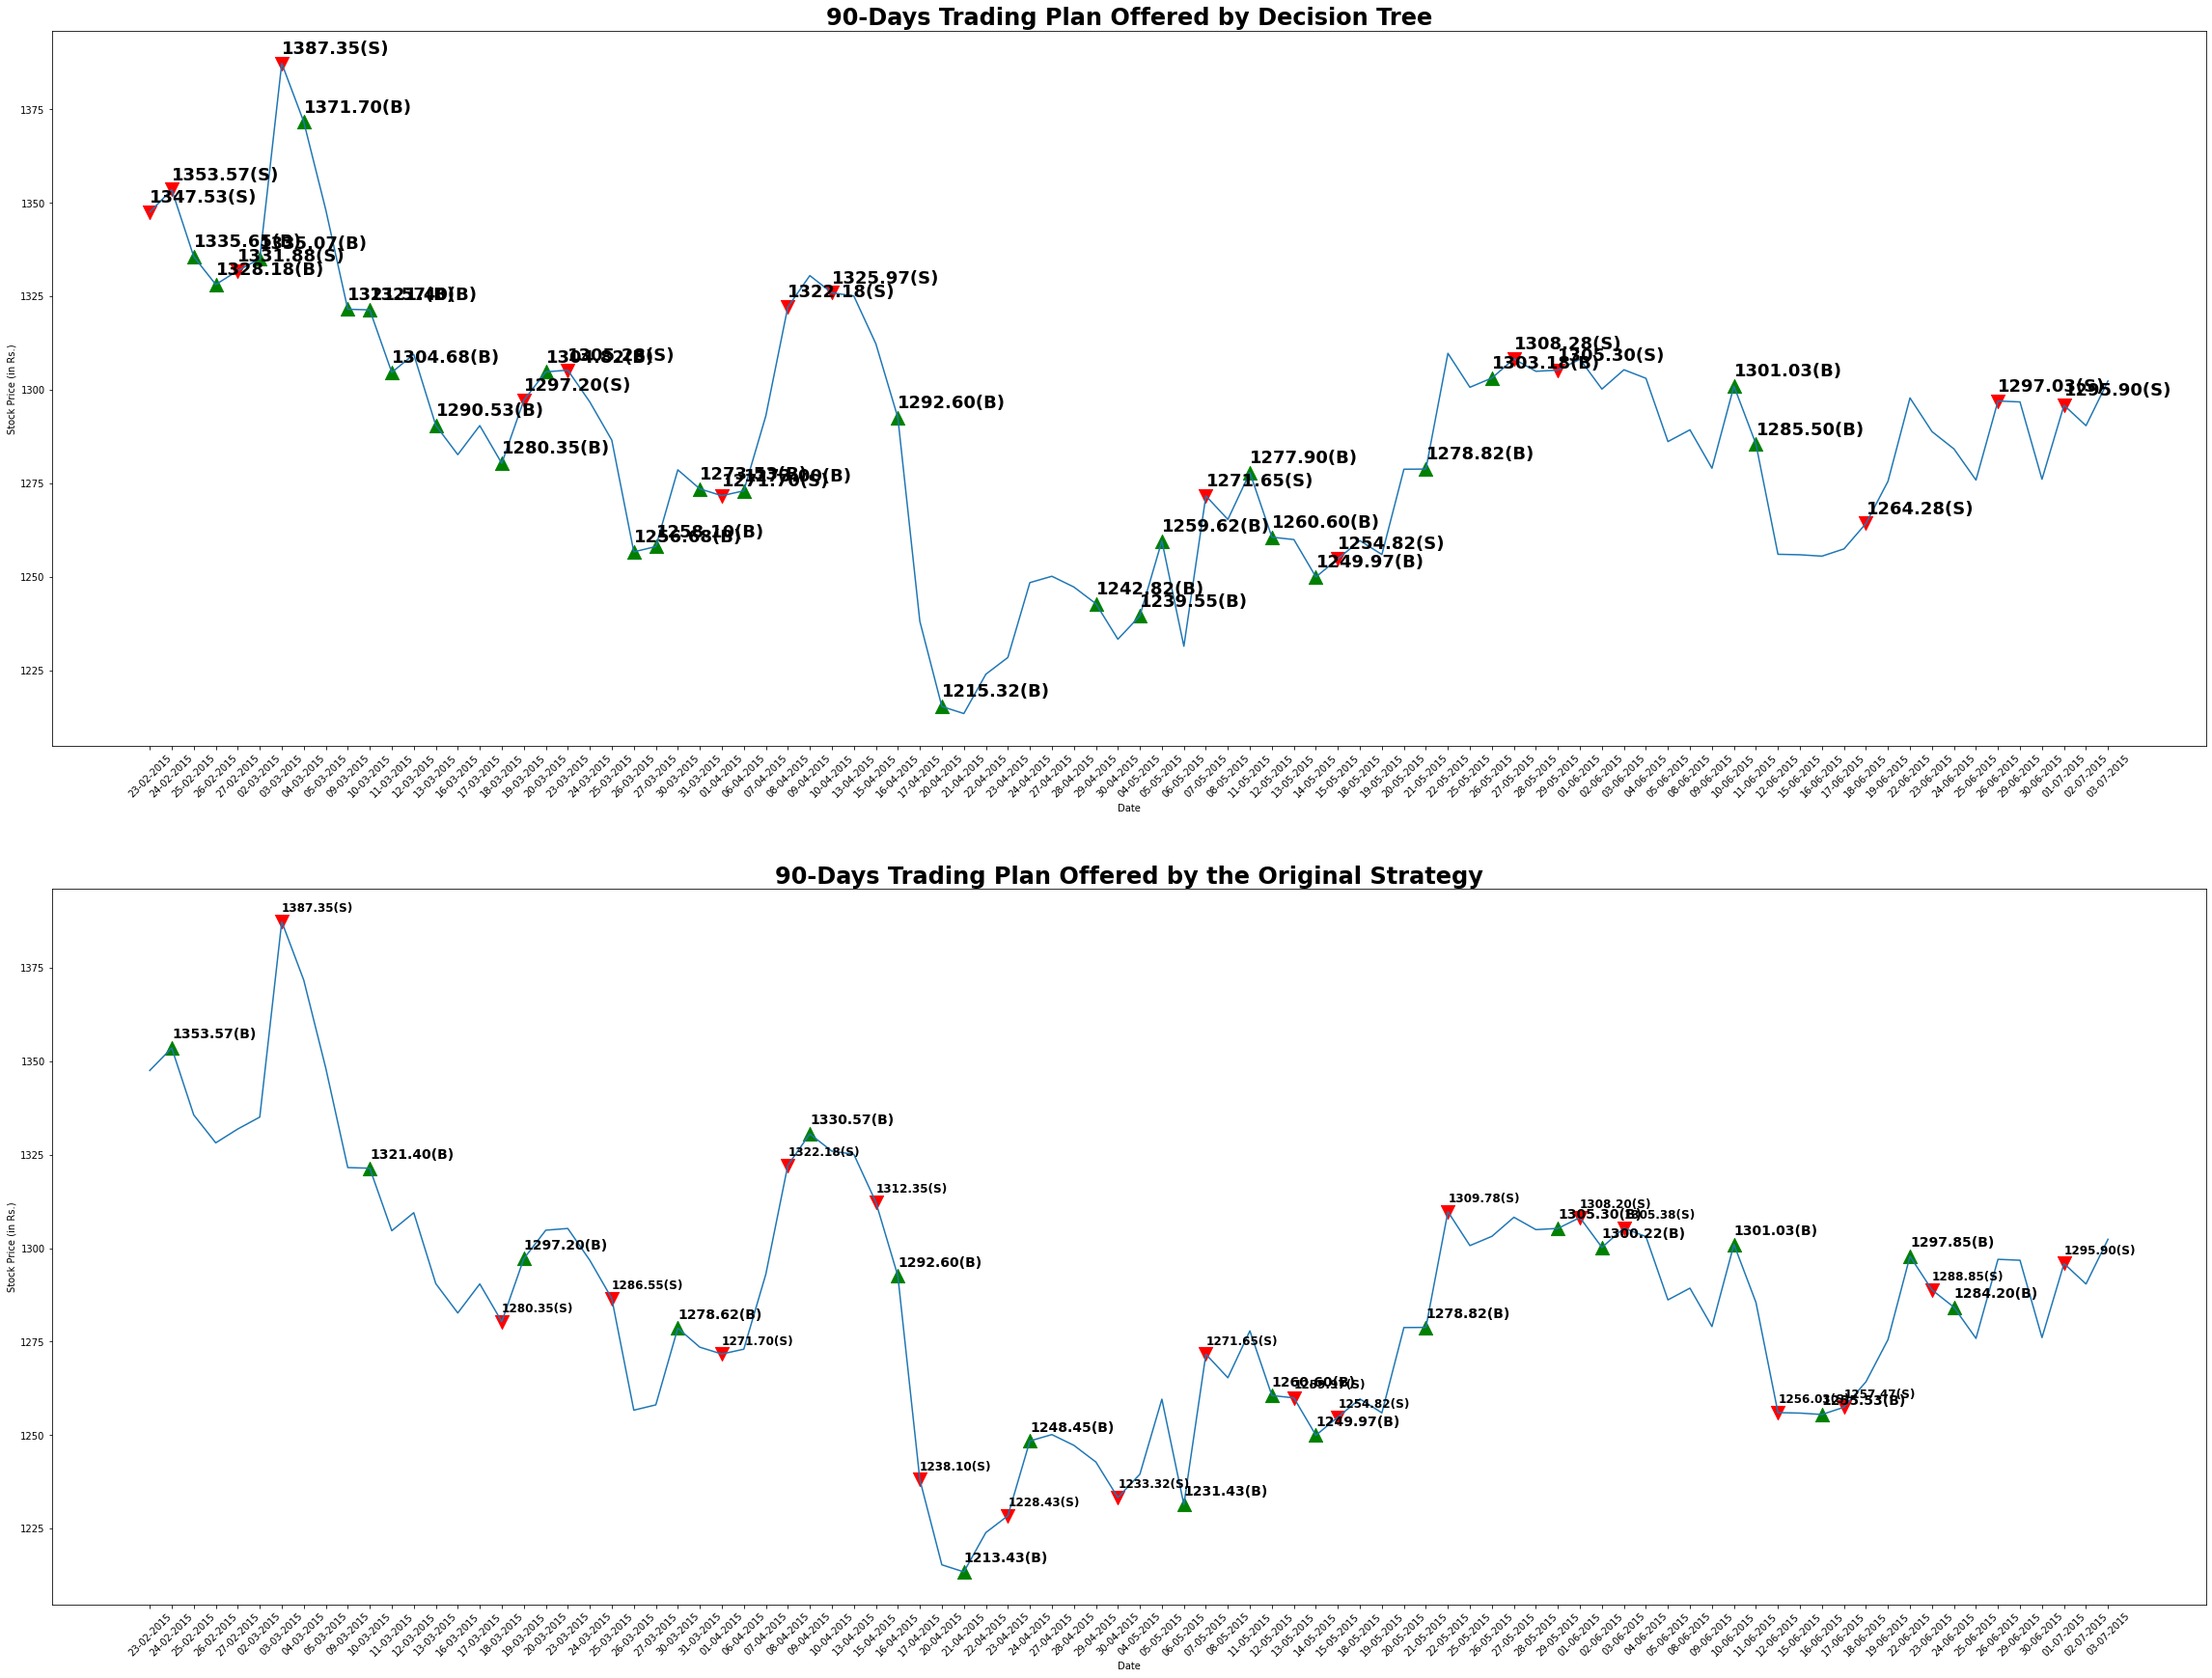

In [109]:
nDays = 90  # N-days for signal visualization
# Visualizing N-days trading plan offered by the model
fig = plt.figure(figsize=(40,30))
plt.subplot(2,1,1)
plt.plot(df['Date'].iloc[floor(n*0.7):floor(n*0.7)+nDays], df['Price'].iloc[floor(n*0.7):floor(n*0.7)+nDays], '-')
i = 0
for x,y in zip(df['Date'].iloc[floor(n*0.7):floor(n*0.7)+nDays],df['Price'].iloc[floor(n*0.7):floor(n*0.7)+nDays]):
    label = ypred[i]
    if(label=='WAIT'): label = ''
    elif(label=='BUY'): 
        label = '{:.2f}(B)'.format(y)
        plt.scatter(x=x, y=y, marker='^', c='g', s=200, alpha=1.0)
        plt.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='left', fontsize=18, fontweight='bold')
    else: 
        label = '{:.2f}(S)'.format(y)
        plt.scatter(x=x, y=y, marker='v', c='r', s=200, alpha=1.0)
        plt.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='left', fontsize=18, fontweight='bold')
    i = i+1
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Stock Price (in Rs.)')
plt.title('90-Days Trading Plan Offered by Decision Tree', fontsize=24, fontweight='bold')

# Visualizing N-days trading plan offered by the original strategy
plt.subplot(2,1,2)
plt.plot(df['Date'].iloc[floor(n*0.7):floor(n*0.7)+nDays], df['Price'].iloc[floor(n*0.7):floor(n*0.7)+nDays], '-')
i = 0
for x,y in zip(df['Date'].iloc[floor(n*0.7):floor(n*0.7)+nDays],df['Price'].iloc[floor(n*0.7):floor(n*0.7)+nDays]):
    label = df['Signal'].iloc[i]
    if(label=='WAIT'): label = ''
    elif(label=='BUY'): 
        label = '{:.2f}(B)'.format(y)
        plt.scatter(x=x, y=y, marker='^', c='g', s=200, alpha=1.0)
        plt.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='left', fontsize=14, fontweight='bold')
    else: 
        label = '{:.2f}(S)'.format(y)
        plt.scatter(x=x, y=y, marker='v', c='r', s=200, alpha=1.0)
        plt.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='left', fontsize=12, fontweight='bold')
    i = i+1
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Stock Price (in Rs.)')
plt.title('90-Days Trading Plan Offered by the Original Strategy', fontsize=24, fontweight='bold')
plt.show()